# Nội dung chính:
1. Vader
2. Naive Bayes
3. Bài tập

Bài toán <b>sentiment analysis</b> (Phân loại cảm xúc - phân loại sắc thái bình luận) là một trong những bài toán cơ bản của NLP. Xác định xem một comment là tích hợp hay tiêu cực hay bình thường. Nó còn được gọi là <b>optinion mining</b> (Khai thác ý kiến) bắt nguồn từ thái độ hoặc ý kiến của người nói.

Tại sao cần sentiment ananysis?
1. Trong kinh doanh: các công ty cần phân loại sắc thái bình luận để phát triển chiến lược của họ, để hiểu cảm xúc của khách hàng về sản phẩm của công ty họ, cách mọi người phản ứng với chiến dịch mới của họ, hoặc tại sao khách hàng không mua 1 số sản phẩm.
2. Trong chính trị: Sử dụng để theo dõi quan điểm chính trị, phân loại những trạng thái nhất trí và phản đối giữa lời nói và hành động của các cấp chính quyền. Nó có thể sử dụng để dự đoán kết quả bầu cử khá tốt.
3. Mạng xã hội: được sử dụng để phân tích và theo dõi các hiện tượng xã hội. Hoặc phát hiện ra các tình huống nguy hiểm tiềm tàng và xác định tâm trạng chung của thế giới blog.

Có 2 phương pháp chính để xử lý bài toán sentiment:
1. Dựa vào tập cá quy tắc do con người đề ra, gọi là heuristic.
2. Sử dụng một mô hình Machine learning để học từ dữ liệu cho máy.

# VADER - Một tập cá quy tắc cơ bản cho bài toán phân tích cảm xúc.

Hutto và Gilbert tại GA Tech đã đưa ra một thuật toán phân tích cảm xúc thành công dựa trên một tập các quy tắc cơ bản. Họ gọi thuật toán này là VADER (Valence Aware Dictionary for sEntiment Reasoning). Nhiều packet NLP implement thuật toán này. Bao gồm cả NLTK.

Bạn cần cài đặt: <b>pip install vaderSentiment</b>

Tìm hiểu thêm:
- Bài báo VADER: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf
- Source code: https://github.com/cjhutto/vaderSentiment

Khi VADER đã được cài đặt, chúng ta gọi đối tượng <b>SentimentIntensityAnalyser </b>:

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Chúng ta có thể hiện danh sách các điểm chấm bằng cách gọi đến <b>lexicon</b>

In [2]:
analyser.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

VADER hoạt động theo kiểu tìm kiếm từ trong câu và chấm điểm, nếu có trong bộ lexicon thì nó sẽ chấm điểm theo quy tắc trong đó, còn không thì bỏ qua.

Chúng ta sử dụng phương thức <b>polarity_scores()</b> để chấm điểm cho một câu nào đó.

In [3]:
analyser.polarity_scores(text="Python is very readable and it's great for NLP.")

{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}

Thuật toán xem xét 3 trạng thái phân biệt: tiêu cực, trung bình và tích cực, sau đó tổng hợp lại thành một trạng thái đánh giá 
tổng là <i>compound</i>

In [4]:
analyser.polarity_scores(text="Python is very bad, like a shittt :((")

{'neg': 0.328, 'neu': 0.432, 'pos': 0.24, 'compound': -0.2534}

In [5]:
len(analyser.lexicon)

7503

Ta thấy lexicon của VADER chỉ có 7503 từ, và thuật toán này bỏ qua những từ không có trong lexicon nên nó còn rất nhiều nhược điểm và không đánh giá chính xác một câu nói được. Đôi khi ngôn ngữ comment của con người còn biến tấu nhiều loại như là không dấu, teen code, ... Vì vậy, thực sự cách này không hiệu quả cho bài toán sentiment, và bạn cũng không muốn mình liên tục phải bổ sung các quy tắc cho lexicon, vì nó làm tăng dữ liệu và đồng thời muốn bổ sung thì bạn cũng cần mất thời gian và hiểu ngôn ngữ. Vì vậy, với cách tiếp cận bài toán sentiment bằng tập các quy tắc do con người đề ra là không hiệu quả. Vì vậy người ta thường tiếp cận theo cách thứ hai, và ở trong bài viết này, tôi giới thiệu 1 thuật toán cơ bản trong Machine learning đó là Naive Bayes.

# Thuật toán Naive Bayes

Naive bayes là một mô hình cố gắng tìm kiếm các từ khoá ở trong tập document của bạn để dự đoán đầu ra mục tiêu. Khi các biến mục tiêu là cảm xúc bạn cần dự đoán, mô hình sẽ tìm kiếm các từ khoá về cảm xúc. Chúng ta cũng có thể áp dụng thuật toán này cho nhiều bài toán khác, sẽ có trong phần bài tập tại đây.

Ở trong bài này, chúng ta áp dụng thuật toán Naive bayes cho bài toán phân lớp văn bản. Tương tự ta có thể áp dụng với bài toán sentiment ananysis.

Data ở trong: <b>./data/classification_text/</b>

Lý thuyết thuật toán xem tại: https://machinelearningcoban.com/2017/08/08/nbc/

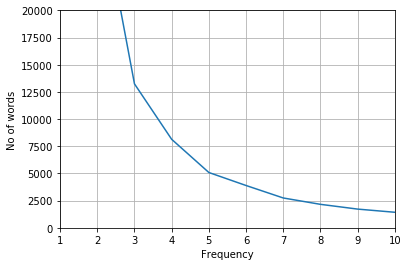

Number of words with frequency higher than cutoff frequency(80) : 4055


In [ ]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = []  # Một phần tử của X có dạng (filename,text)
Y = []  # Một phần tử của Y biểu diễn dưới dạng từng danh mục của X

# duyệt qua từng mục trong thư mục 20_newsgroups
for category in os.listdir('./data/classification_text/20_newsgroups'):
    # duyệt qua từng file trong thư mục con
    for document in os.listdir('./data/classification_text/20_newsgroups/' + category):
        # đọc file text
        with open('./data/classification_text/20_newsgroups/' + category + '/' + document, "r") as f:
            # thêm vào mảng X
            X.append((document, f.read()))
            # thêm nhãn vào mảng Y
            Y.append(category)

# sử dụng sklearn để chia dataset thành 2 phần test và train
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

# định nghĩa 1 số từ tiếng anh thông dụng không ảnh hưởng đến dự đoán
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every',
             'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five',
             'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go',
             'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein',
             'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc',
             'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least',
             'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most',
             'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next',
             'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on',
             'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over',
             'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so',
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence',
             'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third',
             'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top',
             'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was',
             'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas',
             'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole',
             'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

# Xây dựng vốn từ vựng của các tài liệu
vocab = {}  # khai báo một dict rỗng
for i in range(len(X_train)):  # duyệt vòng lặp với kích thước của tập training
    word_list = []  # tạo một list rỗng
    for word in X_train[i][
        1].split():  # duyệt qua từng từ trong text của tập training chú ý x có dạng (tên file, nội dung)
        word_new = word.strip(string.punctuation).lower()  # Bỏ những ký tự đặc biệt ở đầu và cuối chuỗi hàm trip
        if (len(word_new) > 2) and (
                word_new not in stopwords):  # nếu 1 từ có từ 2 từ chở lên và nó không có trong tập từ không có nghĩa!
            if word_new in vocab:  # nếu word_new đã có trong vocab thì
                vocab[word_new] += 1  # nhảy đến vocab và tăng biến đếm lên 1 đơn vị
            else:
                vocab[word_new] = 1  # nếu không thì khởi tạo nó = 1

# vẽ đồ thị với các từ thu được

num_words = [0 for i in range(max(vocab.values()) + 1)]
freq = [i for i in range(max(vocab.values()) + 1)]
for key in vocab:
    num_words[vocab[key]] += 1
plt.plot(freq, num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

cutoff_freq = 80
# For deciding cutoff frequency
# xác định từ có tần số nhiều hơn con số 80 ở trên

num_words_above_cutoff = len(vocab) - sum(num_words[0:cutoff_freq])
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq), num_words_above_cutoff)

# các từ có tần số nhiều hơn số 80 ở trên được chọn làm đặc trưng

features = []
for key in vocab:
    if vocab[key] >= cutoff_freq:
        features.append(key)

# Để biểu diễn datatraing dưới dạng word vector counts
X_train_dataset = np.zeros((len(X_train), len(features)))
# Việc này chạy hơi lâu
for i in range(len(X_train)):  # duyệt qua data train
    # print(i) # bỏ comment để xem nó chạy
    word_list = [word.strip(string.punctuation).lower() for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

# biểu diễn dữ liệu test dưới dạng word vector counts
X_test_dataset = np.zeros((len(X_test), len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = [word.strip(string.punctuation).lower() for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

clf = MultinomialNB()
clf.fit(X_train_dataset, Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset, Y_train)
print("Sklearn's score on training data :", sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset, Y_test)
print("Sklearn's score on testing data :", sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

# 3. Bài tập

1. Code bài toán phân loại sắc thái bình luận tiếng việt sử dụng Naive Bayes, data và test trong <b>./data/sentiment_analysis/</b>. (Bộ dữ liệu này được lấy tại https://www.aivivn.com/ )<br/>
<b>Xử lý các bài toán sau:</b><br/>
* https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews <br/>
(Lời giải tham khảo: https://www.kaggle.com/ankkur13/prediction-based-on-bayes-algo-nlp-wordcloud) <br/>
* https://www.kaggle.com/uciml/sms-spam-collection-dataset <br/>
(Lời giải tham khảo: https://www.kaggle.com/jeffysonar/spam-filter-using-naive-bayes-classifier ) <br/>
* https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set <br/>
(Lời giải tham khảo: https://www.kaggle.com/marklvl/sentiment-classification-using-naive-bayes ) <br/>
* https://www.kaggle.com/c/titanic <br/>
(Lời giải tham khảo: https://www.kaggle.com/coledie/titanic-naive-bayes )